# ALURA'S CHALLENGE | REGEX for schedules

### Objective -> find and mark times on the image


In [40]:
import re 
import pytesseract
from pytesseract import Output
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

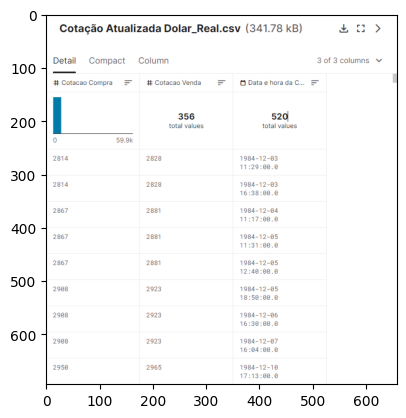

In [41]:
img = cv2.imread('text-recognize/Atividades/Aula4_cotacao.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

In [42]:
config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata' 

result = pytesseract.image_to_data(rgb, output_type=Output.DICT, config=config_tesseract, lang='por')

print(result)

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [43]:
time_pattern = '([01]?[0-9]|2[0-3]):[0-5][0-9](:[0-5][0-9])?'
min_conf = 18
font = 'text-recognize/Imagens/calibri.ttf'

In [44]:
def drawText(text, x, y, img, font, size=20):
    font = ImageFont.truetype(font, size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - size), text)
    img = np.array(img_pil)

    return img

In [45]:
def textBox(result, img, color=(255, 100, 0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

    return x, y, img

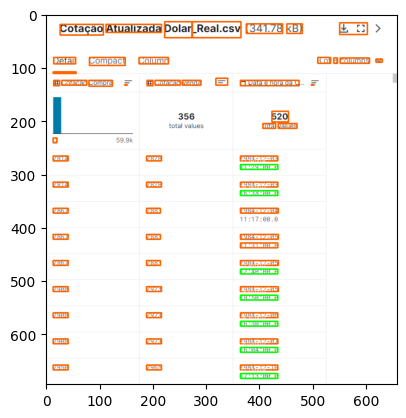

In [46]:
schedules = []
copy_img = rgb.copy()

for i in range(len(result['text'])):

    if int(result['conf'][i]) > min_conf:
        text = result['text'][i]

        if re.match(time_pattern, text):
            x, y, img = textBox(result, copy_img, (0, 255, 0))
            copy_img = drawText(text, x, y, copy_img, font=font, size =12)
            schedules.append(text)
        else:
            x, y, copy_img = textBox(result, copy_img)


plt.imshow(copy_img)

In [47]:
schedules

['11:29:00.8',
 '16:38:00.0',
 '12:40:00.0',
 '18:50:00.0',
 '16:30:00.0',
 '16:04:00.0',
 '17:13:00.8']